BTC 14-Day Forecast with Hyperparameter Tuning

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
from datetime import timedelta

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import plotly.graph_objects as go


In [3]:

#Load Data and Scaler

scaled_df = pd.read_csv(r'C:\Users\allif\Downloads\Crypto_stocks\data\processed\scaled_predictive_coins.csv', parse_dates=['Date'])

scaled_df.head()

# removing null values
scaled_df = scaled_df.dropna()

#Loading the minmax scaler for inverse transformation
scaler = joblib.load(r'C:\Users\allif\Downloads\Crypto_stocks\notebooks\minmax_scaler_close_prices.pkl')



In [4]:
scaled_df.head()

,Date,BTC_close_scaled,ETH_close_scaled,LTC_close_scaled,Gold_close_scaled,BTC_close_logret_scaled,ETH_close_logret_scaled,LTC_close_logret_scaled,Gold_close_logret_scaled
1,2020-08-29,0.012194,0.017367,0.040628,0.184812,0.468048,0.597519,0.624911,0.453046
2,2020-08-30,0.014427,0.024117,0.057795,0.194317,0.544709,0.712650,0.771841,0.637246
3,2020-08-31,0.013866,0.025198,0.052082,0.188633,0.468147,0.601679,0.590747,0.471003
4,2020-09-01,0.016347,0.034471,0.057215,0.193862,0.550350,0.745522,0.674535,0.590320
5,2020-09-02,0.011490,0.026470,0.043788,0.181227,0.350915,0.440990,0.528530,0.394481


In [5]:
# defining coins and columns 

coins = {
    'BTC': {'col': 'BTC_close_scaled'},
    'ETH': {'col': 'ETH_close_scaled'},
    'LTC': {'col': 'LTC_close_scaled'},
    'Gold': {'col': 'Gold_close_scaled'}, 
}


# Define Feature and Target Columns
feature_cols = [
    'BTC_close_scaled', 'ETH_close_scaled', 'LTC_close_scaled', 'Gold_close_scaled',
    'BTC_close_logret_scaled', 'ETH_close_logret_scaled', 'LTC_close_logret_scaled', 'Gold_close_logret_scaled'
]


lookback = 30

forecast_horizon = 14


In [6]:
# Sliding Window Function
def create_sliding_window(df, lookback, forecast_horizon, feature_cols, target_col):
    X, Y = [], []
    for i in range(len(df) - lookback - forecast_horizon + 1):
        X.append(df[feature_cols].iloc[i:i+lookback].values)
        Y.append(df[[target_col]].iloc[i+lookback:i+lookback+forecast_horizon].values)
    return np.array(X), np.array(Y)


In [7]:
# model builder
def build_lstm_model(lstm_units=64, dropout=0.2, lr=0.001):
    from tensorflow.keras.optimizers import Adam
    model = Sequential()
    model.add(LSTM(lstm_units, input_shape=(lookback, len(feature_cols))))
    model.add(Dropout(dropout))
    model.add(Dense(forecast_horizon))
    model.compile(optimizer=Adam(learning_rate=lr), loss='mse')
    return model



====== Processing BTC ======


C:\Users\allif\AppData\Local\Temp\ipykernel_23016\1531165534.py:28: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=build_lstm_model, verbose=0)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END batch_size=16, dropout=0.2, epochs=10, lr=0.001, lstm_units=64; total time=   8.9s
[CV] END batch_size=16, dropout=0.2, epochs=10, lr=0.001, lstm_units=64; total time=   9.9s
[CV] END batch_size=16, dropout=0.2, epochs=10, lr=0.001, lstm_units=64; total time=  12.4s
[CV] END batch_size=16, dropout=0.2, epochs=15, lr=0.0005, lstm_units=64; total time=   8.6s
[CV] END batch_size=16, dropout=0.2, epochs=15, lr=0.0005, lstm_units=64; total time=  15.0s
[CV] END batch_size=16, dropout=0.2, epochs=15, lr=0.0005, lstm_units=64; total time=  18.2s
[CV] END batch_size=16, dropout=0.1, epochs=10, lr=0.0005, lstm_units=32; total time=   6.3s
[CV] END batch_size=16, dropout=0.1, epochs=10, lr=0.0005, lstm_units=32; total time=   8.6s
[CV] END batch_size=16, dropout=0.1, epochs=10, lr=0.0005, lstm_units=32; total time=  13.1s
[CV] END batch_size=32, dropout=0.2, epochs=15, lr=0.001, lstm_units=32; total time=   6.5s
[CV] END batch

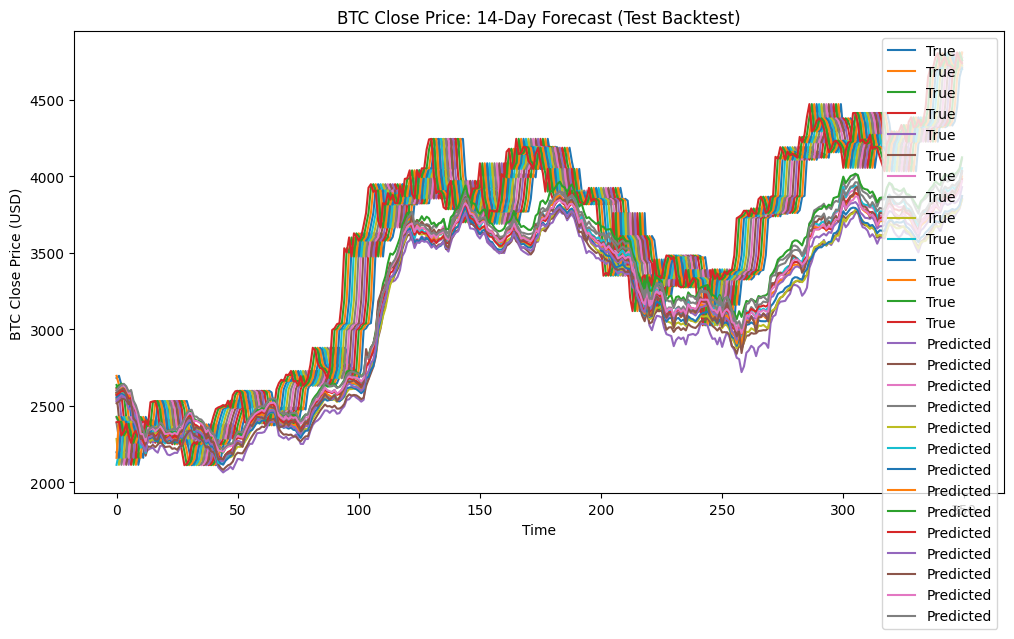

1/1 [==============================] - 0s 45ms/step



All coins processed!
Saved model and scaler for BTC

====== Processing ETH ======


C:\Users\allif\AppData\Local\Temp\ipykernel_23016\1531165534.py:28: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END batch_size=32, dropout=0.1, epochs=15, lr=0.001, lstm_units=64; total time=   9.8s
[CV] END batch_size=32, dropout=0.1, epochs=15, lr=0.001, lstm_units=64; total time=  23.1s
[CV] END batch_size=32, dropout=0.1, epochs=15, lr=0.001, lstm_units=64; total time=  27.7s
[CV] END batch_size=16, dropout=0.1, epochs=15, lr=0.001, lstm_units=32; total time=  19.1s
[CV] END batch_size=16, dropout=0.1, epochs=15, lr=0.001, lstm_units=32; total time=  28.5s
[CV] END batch_size=16, dropout=0.1, epochs=15, lr=0.001, lstm_units=32; total time=  36.8s
[CV] END batch_size=32, dropout=0.1, epochs=15, lr=0.001, lstm_units=32; total time=  10.3s
[CV] END batch_size=32, dropout=0.1, epochs=15, lr=0.001, lstm_units=32; total time=   9.2s
[CV] END batch_size=32, dropout=0.1, epochs=15, lr=0.001, lstm_units=32; total time=  11.7s
[CV] END batch_size=16, dropout=0.2, epochs=15, lr=0.001, lstm_units=64; total time=   9.7s
[CV] END batch_size=

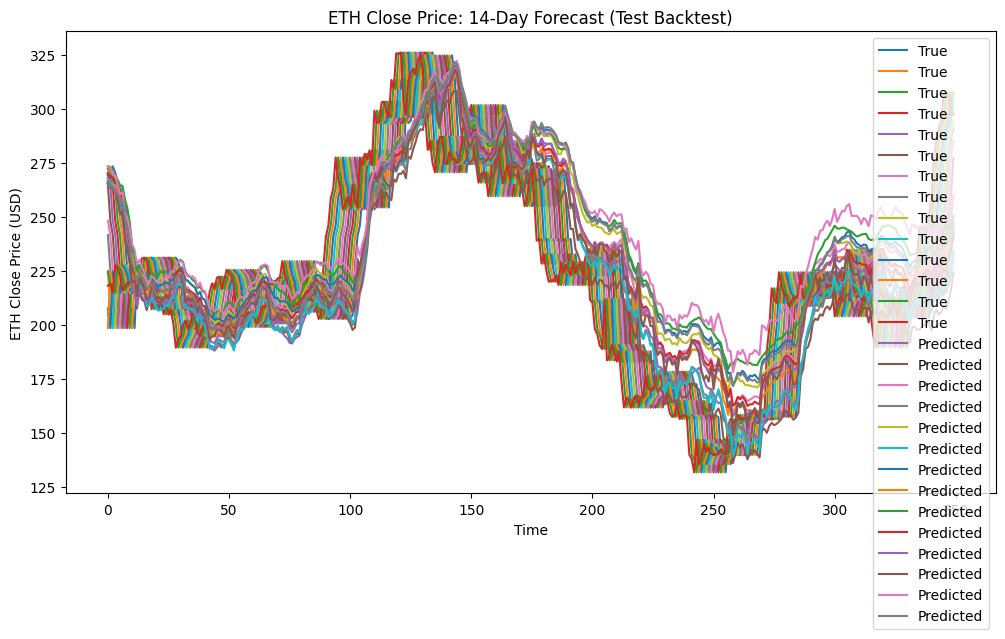

1/1 [==============================] - 0s 67ms/step



All coins processed!
Saved model and scaler for ETH

====== Processing LTC ======


C:\Users\allif\AppData\Local\Temp\ipykernel_23016\1531165534.py:28: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END batch_size=16, dropout=0.2, epochs=10, lr=0.001, lstm_units=64; total time=   8.2s
[CV] END batch_size=16, dropout=0.2, epochs=10, lr=0.001, lstm_units=64; total time=  13.6s
[CV] END batch_size=16, dropout=0.2, epochs=10, lr=0.001, lstm_units=64; total time=  15.9s
[CV] END batch_size=16, dropout=0.1, epochs=10, lr=0.001, lstm_units=32; total time=   6.8s
[CV] END batch_size=16, dropout=0.1, epochs=10, lr=0.001, lstm_units=32; total time=  13.1s
[CV] END batch_size=16, dropout=0.1, epochs=10, lr=0.001, lstm_units=32; total time=  15.8s
[CV] END batch_size=16, dropout=0.2, epochs=15, lr=0.001, lstm_units=64; total time=  11.1s
[CV] END batch_size=16, dropout=0.2, epochs=15, lr=0.001, lstm_units=64; total time=  17.2s
[CV] END batch_size=16, dropout=0.2, epochs=15, lr=0.001, lstm_units=64; total time=  26.4s
[CV] END batch_size=32, dropout=0.1, epochs=15, lr=0.0005, lstm_units=64; total time=   8.9s
[CV] END batch_size

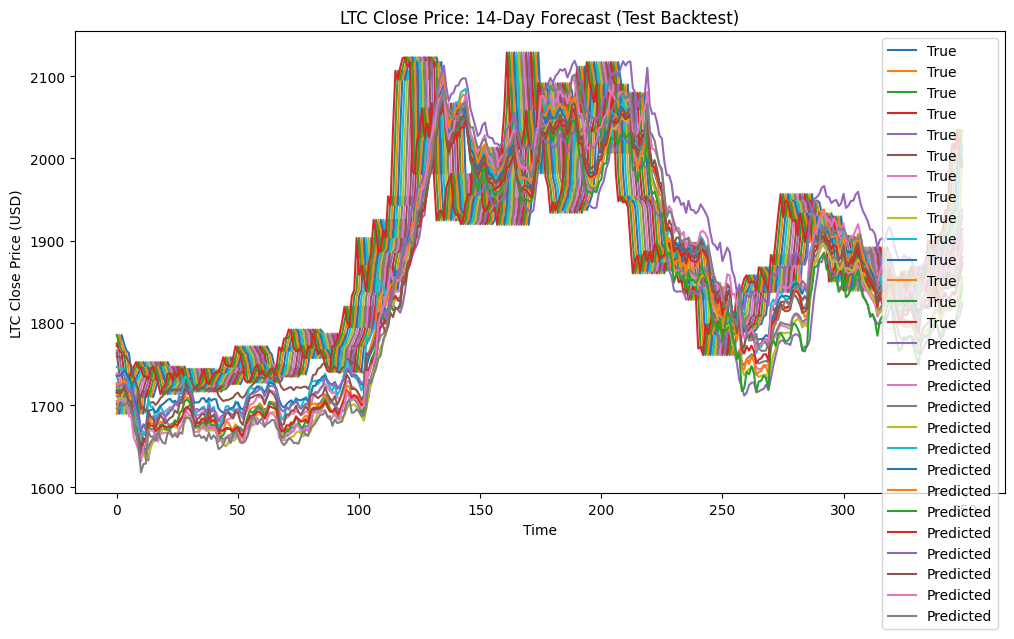

1/1 [==============================] - 0s 49ms/step



All coins processed!
Saved model and scaler for LTC

====== Processing Gold ======


C:\Users\allif\AppData\Local\Temp\ipykernel_23016\1531165534.py:28: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END batch_size=16, dropout=0.2, epochs=10, lr=0.0005, lstm_units=32; total time=   7.7s
[CV] END batch_size=16, dropout=0.2, epochs=10, lr=0.0005, lstm_units=32; total time=  10.9s
[CV] END batch_size=16, dropout=0.2, epochs=10, lr=0.0005, lstm_units=32; total time=  16.4s
[CV] END batch_size=32, dropout=0.1, epochs=10, lr=0.001, lstm_units=32; total time=   5.5s
[CV] END batch_size=32, dropout=0.1, epochs=10, lr=0.001, lstm_units=32; total time=   8.6s
[CV] END batch_size=32, dropout=0.1, epochs=10, lr=0.001, lstm_units=32; total time=  11.0s
[CV] END batch_size=32, dropout=0.2, epochs=10, lr=0.0005, lstm_units=64; total time=   6.4s
[CV] END batch_size=32, dropout=0.2, epochs=10, lr=0.0005, lstm_units=64; total time=  10.0s
[CV] END batch_size=32, dropout=0.2, epochs=10, lr=0.0005, lstm_units=64; total time=  13.2s
[CV] END batch_size=32, dropout=0.1, epochs=10, lr=0.0005, lstm_units=64; total time=   6.7s
[CV] END batc

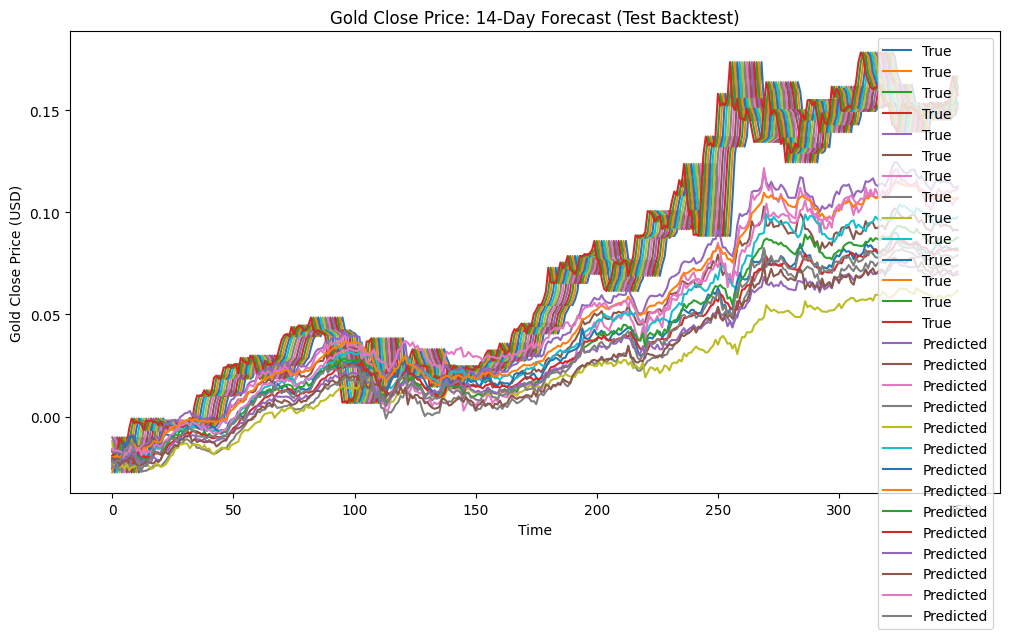

1/1 [==============================] - 0s 39ms/step



All coins processed!
Saved model and scaler for Gold


In [8]:
# Inverse scaling helper
def inverse_close(scaled_arr, scaler, col_index):
    # Always keep the array as 2D for batch inverse_transform
    scaled_arr = np.array(scaled_arr)
    flat = scaled_arr.reshape(-1)
    arr = np.zeros((flat.shape[0], scaler.n_features_in_))
    arr[:, col_index] = flat
    inv = scaler.inverse_transform(arr)[:, col_index]
    return inv.reshape(scaled_arr.shape)


# Main loop
for coin, info in coins.items():
    print(f"\n====== Processing {coin} ======")
    target_col = info['col']
    col_index = scaled_df.columns.get_loc(target_col)
    target_cols = [target_col]
    
    # Prepare data
    X, Y = create_sliding_window(scaled_df, lookback, forecast_horizon, feature_cols, target_col)
    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    Y_train, Y_test = Y[:split], Y[split:]
    Y_train_flat = Y_train.reshape(-1, forecast_horizon)
    Y_test_flat = Y_test.reshape(-1, forecast_horizon)
    
    # Hyperparameter search (reduce n_iter/epochs for testing, increase for final)
    model = KerasRegressor(build_fn=build_lstm_model, verbose=0)
    param_dist = {
        "lstm_units": [32, 64],
        "dropout": [0.1, 0.2],
        "lr": [1e-3, 5e-4],
        "batch_size": [16, 32],
        "epochs": [10, 15]}

    tscv = TimeSeriesSplit(n_splits=3)
    search = RandomizedSearchCV(
        model, param_distributions=param_dist, n_iter=4,
        cv=tscv, verbose=2, n_jobs=1)
    search.fit(X_train, Y_train_flat)
    print(f"Best hyperparameters for {coin}:", search.best_params_)

    # Retrain best model
    best_params = search.best_params_
    final_model = build_lstm_model(
        lstm_units=best_params["lstm_units"],
        dropout=best_params["dropout"],
        lr=best_params["lr"])


    final_model.fit(
        X_train, Y_train_flat,
        epochs=best_params["epochs"],
        batch_size=best_params["batch_size"],
        verbose=2)
    
    
    # Evaluate on test
    # Predict on test
    y_pred = final_model.predict(X_test).reshape(-1, forecast_horizon)
    y_test_flat = Y_test.reshape(-1, forecast_horizon)

    # Inverse transform (works for 1D or 2D horizon)
    true_unscaled = inverse_close(y_test_flat, scaler, col_index)
    pred_unscaled = inverse_close(y_pred, scaler, col_index)

    # Now calculate metrics
    mae = mean_absolute_error(true_unscaled, pred_unscaled)
    rmse = mean_squared_error(true_unscaled, pred_unscaled, squared=False)
    r2 = r2_score(true_unscaled, pred_unscaled)
    print(f"{coin} MAE: {mae:.2f} | RMSE: {rmse:.2f} | R2: {r2:.4f}")
    
    # Plot backtest
    plt.figure(figsize=(12,6))
    plt.plot(true_unscaled, label='True')
    plt.plot(pred_unscaled, label='Predicted')
    plt.title(f'{coin} Close Price: 14-Day Forecast (Test Backtest)')
    plt.xlabel('Time')
    plt.ylabel(f'{coin} Close Price (USD)')
    plt.legend()
    plt.show()
    
    
    # Future forecast (next 14 days)
    last_window = scaled_df[feature_cols].iloc[-lookback:].values.reshape(1, lookback, len(feature_cols))
    future_scaled = final_model.predict(last_window).reshape(forecast_horizon)
    future_unscaled = inverse_close(future_scaled, scaler, col_index).flatten()
    last_date = scaled_df['Date'].iloc[-1]
    future_dates = pd.date_range(last_date + timedelta(days=1), periods=forecast_horizon)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=future_dates, y=future_unscaled, mode='lines+markers', name=f'{coin} Forecast (next 14d)'))
    fig.update_layout(title=f'{coin} 14-Day Future Forecast (Unseen Data)', xaxis_title='Date', yaxis_title=f'{coin} Close Price (USD)')
    fig.show()

    # Save model and results
    final_model.save(f'{coin.lower()}_lstm_14d_tuned_model.h5')
    joblib.dump(scaler, f'minmax_scaler_{coin.lower()}.pkl')

    print("\nAll coins processed!")
    
    # Save model and scaler
    print(f"Saved model and scaler for {coin}")


   